In [1]:
!pip install psycopg2

In [33]:
# Import the dependencies.
import pandas as pd
import psycopg2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [14]:
conn = psycopg2.connect(database = "MicroplasticsV3", 
                        user = "postgres", 
                        host= 'localhost',
                        password = "Nutbutt16",
                        port = 5432)

In [16]:
cur = conn.cursor()
cur.execute('SELECT * FROM Microplastics;')
rows = cur.fetchone()
conn.commit()
for row in rows:
    print(row)

9676
Atlantic Ocean
None
None
Grab sample
0.018
pieces/m3
0.005-1
Medium
Barrows et al.2018
Barrows, A.P.W., S.E. Cathey, C.W. Petersen. 2018. Marine environment microfiber contamination: global patterns and the diversity of microparticle origins. Environ. Pollut. 237, 275?284
https://doi.org/10.1016/j.envpol.2018.02.062
Adventure Scientist
Adventure Scientist/Citizen Science
211009.0
https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.nodc:211009
-31.696
-48.56
2015-08-11
a77121b2-e113-444e-82d9-7af11d62fdd2
-48.5599999999999
-31.696


In [19]:
cur = conn.cursor()
cur.execute('SELECT * FROM Microplastics;')
rows = cur.fetchall()
conn.commit()

In [20]:
df=pd.DataFrame(rows, columns=['OBJECTID','Oceans','Regions','SubRegions','Sampling_Method',
                               'Measurement','Unit','Density_Range','Density_Class',
                               'Short_Reference','Long_Reference','DOI','Organization','Keywords',
                               'Accession_Number','Accession_Link','Latitude','Longitude','Date','GlobalID','x','y'])
df.head()

,OBJECTID,Oceans,Regions,SubRegions,Sampling_Method,Measurement,Unit,Density_Range,Density_Class,Short_Reference,...,Organization,Keywords,Accession_Number,Accession_Link,Latitude,Longitude,Date,GlobalID,x,y
0,9676,Atlantic Ocean,None,None,Grab sample,0.018,pieces/m3,0.005-1,Medium,Barrows et al.2018,...,Adventure Scientist,Adventure Scientist/Citizen Science,211009.0,https://www.ncei.noaa.gov/access/metadata/land...,-31.696000,-48.560000,2015-08-11,a77121b2-e113-444e-82d9-7af11d62fdd2,-48.560000,-31.696000
1,6427,Pacific Ocean,None,None,Neuston net,0.000,pieces/m3,0-0.0005,Very Low,Law et al.2014,...,Sea Education Association,SEA,211008.0,https://www.ncei.noaa.gov/access/metadata/land...,6.350000,-121.850000,2002-12-18,be27c450-02ca-4261-8d89-cae21108e6cc,-121.850000,6.350000
2,10672,Pacific Ocean,None,None,Manta net,0.013,pieces/m3,0.005-1,Medium,Goldstein et al.2013,...,Scripps Institution of Oceanography-University...,Great Pacific Garbage Patch/SEAPLEX,253448.0,https://www.ncei.noaa.gov/access/metadata/land...,0.500000,-95.350000,2006-10-17,23effcdd-35b7-4e1e-adb4-390693a287d3,-95.350000,0.500000
3,13921,Atlantic Ocean,None,None,Aluminum bucket,1368.000,pieces/m3,>=10,Very High,Queiroz et al.2022,...,"Federal University of Pará, Brazil",Amazon Continental Shelf,276482.0,https://www.ncei.noaa.gov/access/metadata/land...,0.631825,-45.398158,2018-10-17,16d77822-0533-4116-97b9-0bdb592f3d6e,-45.398158,0.631825
4,8016,Pacific Ocean,None,None,Neuston net,0.000,pieces/m3,0-0.0005,Very Low,Law et al.2014,...,Sea Education Association,SEA,211008.0,https://www.ncei.noaa.gov/access/metadata/land...,15.250000,-157.550000,2010-11-17,c9580902-d939-46cc-afdd-aace299849a7,-157.550000,15.250000


In [21]:
#caculate total rows
print(len(df))

20573


In [23]:
# Calculate the total number of Ocians
ocean_countV2 = len(df["Oceans"].value_counts())
ocean_countV2

4

In [24]:
#display all values in the column Ocians
unique = df["Oceans"].unique()
unique

array(['Atlantic Ocean', 'Pacific Ocean', 'Arctic Ocean', None,
       'Indian Ocean'], dtype=object)

In [25]:
df.columns

Index(['OBJECTID', 'Oceans', 'Regions', 'SubRegions', 'Sampling_Method',
       'Measurement', 'Unit', 'Density_Range', 'Density_Class',
       'Short_Reference', 'Long_Reference', 'DOI', 'Organization', 'Keywords',
       'Accession_Number', 'Accession_Link', 'Latitude', 'Longitude', 'Date',
       'GlobalID', 'x', 'y'],
      dtype='object')

In [47]:
sorted_df = df[["Oceans","Regions", "Measurement", "Unit"]]
sorted_df.head()

,Oceans,Regions,Measurement,Unit
0,Atlantic Ocean,None,0.018,pieces/m3
1,Pacific Ocean,None,0.000,pieces/m3
2,Pacific Ocean,None,0.013,pieces/m3
3,Atlantic Ocean,None,1368.000,pieces/m3
4,Pacific Ocean,None,0.000,pieces/m3


In [48]:
oceans = sorted_df["Oceans"].unique()
oceans

array(['Atlantic Ocean', 'Pacific Ocean', 'Arctic Ocean', None,
       'Indian Ocean'], dtype=object)

In [49]:
#Finding the average of microplastics per cubic meter the Atlantic Ocean, Pacific Ocean, Artic Ocean 
#and Indian Ocean per cubic meter

#Atlantic
at_ocean = sorted_df[sorted_df['Oceans'] == 'Atlantic Ocean']
at_ocean

at_ocean_measurment = at_ocean['Measurement']
avg_at_measurement = at_ocean_measurment.mean()
print(f"The average amount of microplastics per cubic meter in the Atlantic Ocean: {avg_at_measurement}")

#Pacific Ocean
pac_ocean = sorted_df[sorted_df['Oceans'] == 'Pacific Ocean']
pac_ocean

pac_ocean_measurment = pac_ocean['Measurement']
avg_pac_measurement = pac_ocean_measurment.mean()
print(f"The average amount of microplastics per cubic meter in the Pacific Ocean: {avg_pac_measurement}")

#Arctic Ocean
ar_ocean = sorted_df[sorted_df['Oceans'] == 'Arctic Ocean']
ar_ocean

ar_ocean_measurment = ar_ocean['Measurement']
avg_ar_measurement = ar_ocean_measurment.mean()
print(f"The average amount of microplastics per cubic meter in the Arctic Ocean: {avg_ar_measurement}")

#Indian Ocean
in_ocean = sorted_df[sorted_df['Oceans'] == 'Indian Ocean']
in_ocean

in_ocean_measurment = in_ocean['Measurement']
avg_in_measurement = in_ocean_measurment.mean()
print(f"The average amount of microplastics per cubic meter in the Indian Ocean: {avg_in_measurement}")

The average amount of microplastics per cubic meter in the Atlantic Ocean: 187.53485921085593
The average amount of microplastics per cubic meter in the Pacific Ocean: 108.07773870645306
The average amount of microplastics per cubic meter in the Arctic Ocean: 9.844635802884616
The average amount of microplastics per cubic meter in the Indian Ocean: 0.8179630163934429


           Oceans  Average Microplastics (per cubic meter)
0  Atlantic Ocean                               187.534859
1   Pacific Ocean                               108.077739
2    Arctic Ocean                                 9.844636
3    Indian Ocean                                 0.817963


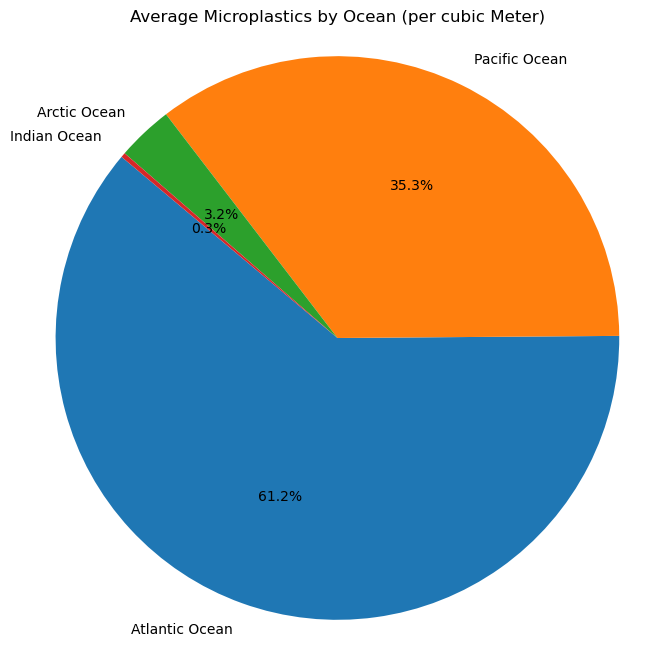

In [50]:
#Create DataFrame with the average per ocean and plot the comparison
oceans_avg_data = {
    'Oceans': ['Atlantic Ocean', 'Pacific Ocean', 'Arctic Ocean', 'Indian Ocean'],
    'Average Microplastics (per cubic meter)': [avg_at_measurement, avg_pac_measurement, avg_ar_measurement, avg_in_measurement]}

oceans_df = pd.DataFrame(oceans_avg_data)
print(oceans_df)

#plot the comparison
labels = oceans_df['Oceans']
sizes = oceans_df['Average Microplastics (per cubic meter)']

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Average Microplastics by Ocean (per cubic Meter)')
plt.axis('equal')
plt.show()

In [51]:
#Create DataFrame of the smaller dataset for comparisons
reduced_oceans_df = pd.DataFrame(sorted_df)
reduced_oceans_df.head()

,Oceans,Regions,Measurement,Unit
0,Atlantic Ocean,None,0.018,pieces/m3
1,Pacific Ocean,None,0.000,pieces/m3
2,Pacific Ocean,None,0.013,pieces/m3
3,Atlantic Ocean,None,1368.000,pieces/m3
4,Pacific Ocean,None,0.000,pieces/m3


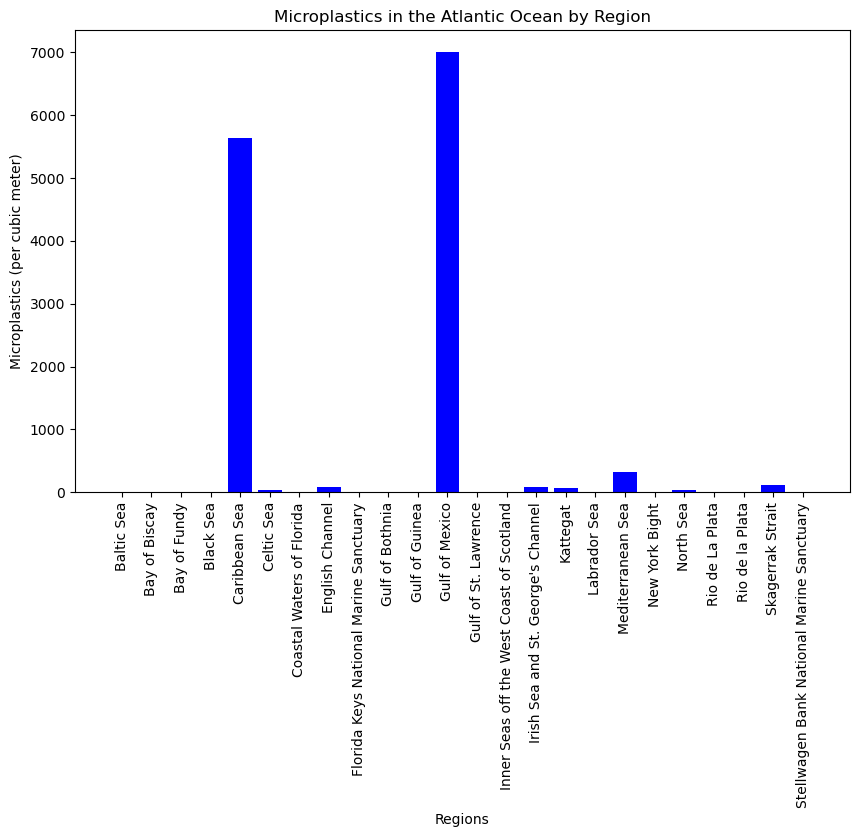

In [61]:
#Plot the Atlantic Ocean Data by Region
specific_ocean = "Atlantic Ocean"
ocean_df = reduced_oceans_df[reduced_oceans_df['Oceans'] == specific_ocean]

ocean_df = ocean_df.dropna(subset=['Regions'])
atlantic_ocean_df = ocean_df.sort_values(by="Regions")
regions = atlantic_ocean_df['Regions']
measurements = atlantic_ocean_df['Measurement']

plt.figure(figsize=(10,6))
plt.bar(regions, measurements, color='blue')
plt.xlabel('Regions')
plt.ylabel('Microplastics (per cubic meter)')
plt.title('Microplastics in the Atlantic Ocean by Region')
plt.xticks(rotation=90)
plt.show()

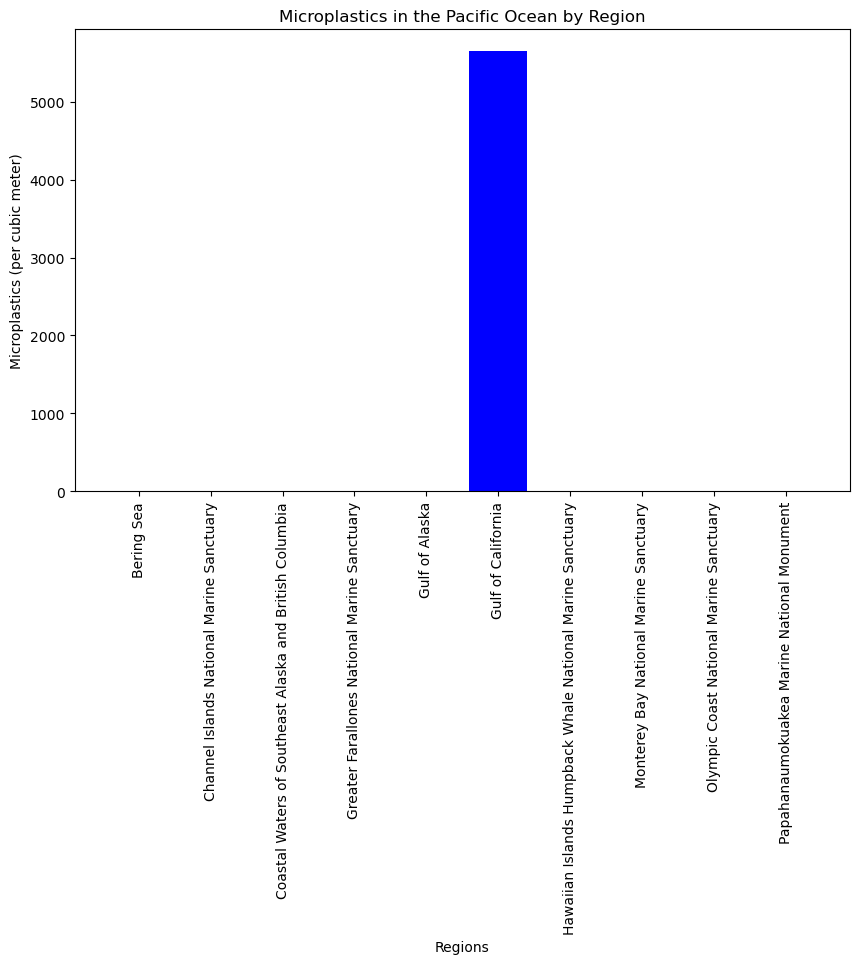

In [62]:
#Plot the Pacific Ocean Data by Region
specific_ocean = "Pacific Ocean"
ocean_df = reduced_oceans_df[reduced_oceans_df['Oceans'] == specific_ocean]

ocean_df = ocean_df.dropna(subset=['Regions'])
pacific_ocean_df = ocean_df.sort_values(by="Regions")
regions = pacific_ocean_df['Regions']
measurements = pacific_ocean_df['Measurement']

plt.figure(figsize=(10,6))
plt.bar(regions, measurements, color='blue')
plt.xlabel('Regions')
plt.ylabel('Microplastics (per cubic meter)')
plt.title('Microplastics in the Pacific Ocean by Region')
plt.xticks(rotation=90)
plt.show()

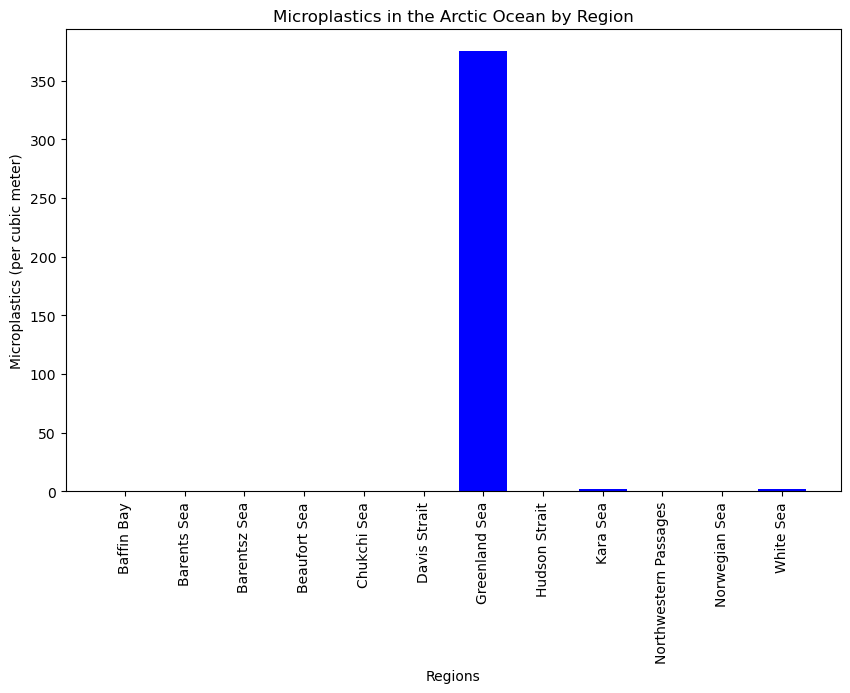

In [63]:
#Plot the Arctic Ocean Data by Region
specific_ocean = "Arctic Ocean"
ocean_df = reduced_oceans_df[reduced_oceans_df['Oceans'] == specific_ocean]

ocean_df = ocean_df.dropna(subset=['Regions'])
arctic_ocean_df = ocean_df.sort_values(by="Regions")
regions = arctic_ocean_df['Regions']
measurements = arctic_ocean_df['Measurement']

plt.figure(figsize=(10,6))
plt.bar(regions, measurements, color='blue')
plt.xlabel('Regions')
plt.ylabel('Microplastics (per cubic meter)')
plt.title('Microplastics in the Arctic Ocean by Region')
plt.xticks(rotation=90)
plt.show()

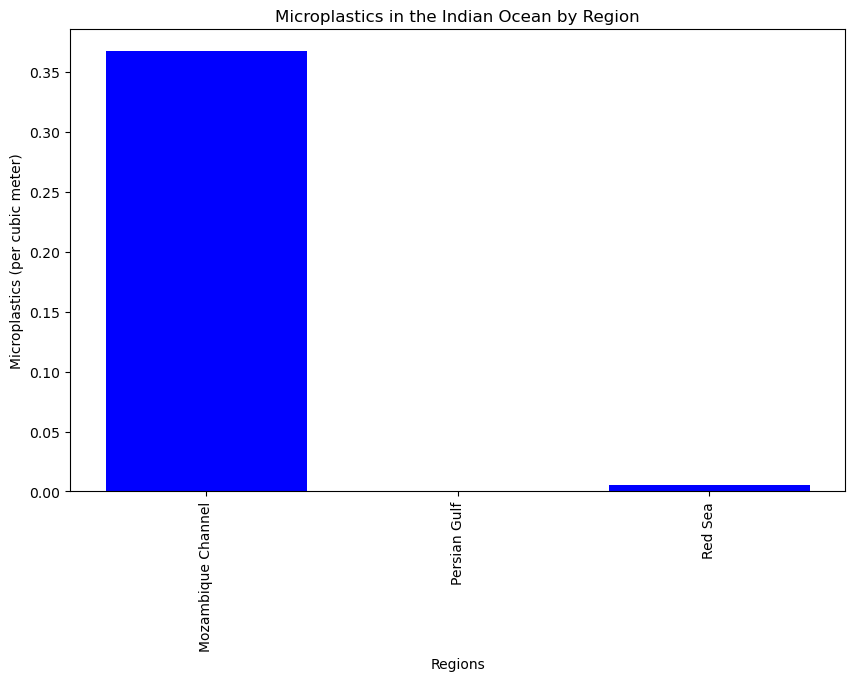

In [64]:
#Plot the Indian Ocean Data by Region
specific_ocean = "Indian Ocean"
ocean_df = reduced_oceans_df[reduced_oceans_df['Oceans'] == specific_ocean]

ocean_df = ocean_df.dropna(subset=['Regions'])
indian_ocean_df = ocean_df.sort_values(by="Regions")
regions = indian_ocean_df['Regions']
measurements = indian_ocean_df['Measurement']

plt.figure(figsize=(10,6))
plt.bar(regions, measurements, color='blue')
plt.xlabel('Regions')
plt.ylabel('Microplastics (per cubic meter)')
plt.title('Microplastics in the Indian Ocean by Region')
plt.xticks(rotation=90)
plt.show()